In [1]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm, lognorm
from scipy.stats import poisson, pareto, burr, burr12, pearsonr, gamma
import seaborn as sns
import random
import pandas as pd
import statistics
import csv
from statistics import geometric_mean, harmonic_mean

### Ogólny opis

Dane pochodzą ze strony finance.yahoo.com, Y - kurs euro przez 5 lat, X - kurs PLN przez 5 lat ( 17.04.2017 - 17.04.2022)

In [2]:
Y = pd.read_csv ('EURO.csv')
X = pd.read_csv('PLN.csv')

In [3]:
def ecdf(xdata):
    xdataecdf = np.sort(xdata)
    ydataecdf = np.arange(1, len(xdata) + 1) / len(xdata)
    return xdataecdf, ydataecdf

In [4]:
def cor_pearson(X,Y):
        S = np.std(X)*np.std(Y)
        su = 0
        for i in range(len(X)):
            if X[i] == 'null' or Y[i] == 'null':
                pass
            else:
                su +=  X[i]*Y[i]
        av_X = np.sum(X)/len(X)
        av_Y = np.sum(Y)/len(Y)
        res = (su-len(X)*av_X*av_Y)/((len(X))*S)
        return res

In [5]:
x = X['Open']
y = Y['Open']

In [6]:
cor_pearson(x,y)

-0.7364304515082545

In [7]:
pearsonr(x,y)

(-0.7364304515089344, 4.64289229370096e-223)

### Statystyki 

In [8]:
def charact(X):
    mediana = statistics.median(X)
    q25, q75 = X.quantile([0.25,0.75])
    rozst_mkw = q75 - q25
    proba = X
    xmin, xmax = min(proba), max(proba)
    rozst = xmax - xmin
    wariancja = statistics.variance(X)
    odchylenie = statistics.stdev(X)
    wspl = odchylenie/proba.mean() * 100
    print('Mediana: %s'%mediana)
    print('Kwartyle: %s, %s'%(q25,q75))
    print('rozstęp międzykwartylowy: %s'%rozst_mkw)
    print('rozstęp: %s'%rozst)
    print('wariancja:%s'%wariancja)
    print('odchylenie:%s '%odchylenie)
    print('współczynnik zmienności:%s'%wspl)

In [9]:
charact(x)

Mediana: 3.79344
Kwartyle: 3.70038, 3.9026
rozstęp międzykwartylowy: 0.20222000000000007
rozstęp: 1.2487600000000003
wariancja:0.036632682961865164
odchylenie:0.19139666392564203 
współczynnik zmienności:5.034969577072508


In [10]:
charact(y)

Mediana: 1.153216
Kwartyle: 1.1207115, 1.1842519999999999
rozstęp międzykwartylowy: 0.06354049999999978
rozstęp: 0.19014599999999993
wariancja:0.0017262886618688127
odchylenie:0.041548630084141315 
współczynnik zmienności:3.6000478265090043


### Wykresy X

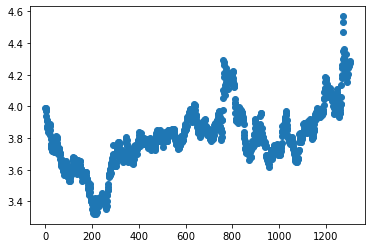

In [11]:
plt.scatter(np.arange(len(x)),x)

(array([0.2151021 , 0.33801759, 0.52239081, 0.79895066, 0.36874646,
        0.15364436, 0.2151021 , 0.09218661, 0.36874646, 0.89113727,
        0.58384856, 0.79895066, 1.10623937, 1.5057147 , 1.84373228,
        2.05883438, 2.55049632, 2.94997165, 2.91924278, 2.70414068,
        2.64268294, 2.151021  , 1.84373228, 1.35207034, 1.59790131,
        1.65935905, 1.01405276, 0.52239081, 0.27655984, 0.46093307,
        0.46093307, 0.36874646, 0.2151021 , 0.4302042 , 0.49166194,
        0.52239081, 0.2151021 , 0.30728871, 0.24583097, 0.06145774,
        0.06145774, 0.06145774, 0.        , 0.        , 0.        ,
        0.03072887, 0.        , 0.        , 0.03072887, 0.03072887]),
 array([3.32054  , 3.3455152, 3.3704904, 3.3954656, 3.4204408, 3.445416 ,
        3.4703912, 3.4953664, 3.5203416, 3.5453168, 3.570292 , 3.5952672,
        3.6202424, 3.6452176, 3.6701928, 3.695168 , 3.7201432, 3.7451184,
        3.7700936, 3.7950688, 3.820044 , 3.8450192, 3.8699944, 3.8949696,
        3.9199448, 3.9

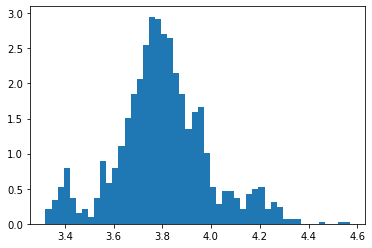

In [31]:
plt.hist(x, density = True, bins=50)
#plt.plot(np.arange(3,5,0.01),norm.pdf(np.arange(3,5,0.01),3.8,1/7))

<AxesSubplot:xlabel='Open', ylabel='Density'>

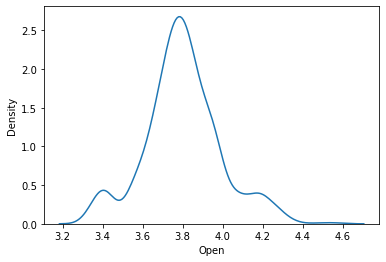

In [13]:
sns.kdeplot(x)

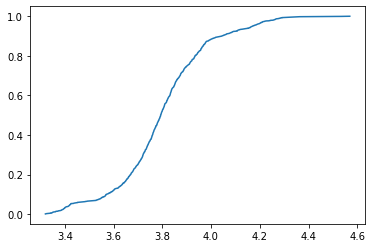

In [32]:
x_x,x_y = ecdf(x)
plt.plot(x_x,x_y)
#plt.plot(np.arange(3,5,0.01),norm.cdf(np.arange(3,5,0.01),3.8,1/7))

{'whiskers': [<matplotlib.lines.Line2D at 0x252733e6a00>,
 'caps': [<matplotlib.lines.Line2D at 0x252733f30d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x252733e6790>],
 'medians': [<matplotlib.lines.Line2D at 0x252733f37f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x252733f3b80>],
 'means': []}

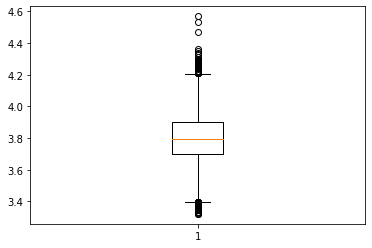

In [15]:
plt.boxplot(x)

### Wykresy Y

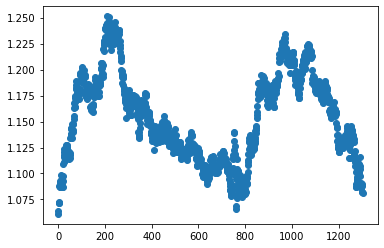

In [16]:
plt.scatter(np.arange(len(y)),y)

(array([ 0.40361602,  0.20180801,  0.60542402,  0.20180801,  1.21084805,
         3.43073613,  4.43977617,  4.23796816,  4.23796816,  4.03616015,
         7.26508827,  4.64158418,  8.67774433,  6.86147226,  8.67774433,
         9.88859237,  9.08136034,  9.28316835, 11.90667245, 10.4940164 ,
         8.67774433,  6.25604824,  4.23796816,  1.61446406,  4.03616015,
         6.45785624,  5.65062421,  7.06328027,  6.65966425,  9.88859237,
        11.90667245, 11.90667245, 10.29220839,  7.46689628,  6.45785624,
         4.03616015,  2.82531211,  2.82531211,  3.83435214,  4.03616015,
         5.04520019,  4.03616015,  2.82531211,  4.23796816,  3.22892812,
         2.6235041 ,  2.42169609,  1.61446406,  0.60542402,  0.40361602]),
 array([1.061121  , 1.06492392, 1.06872684, 1.07252976, 1.07633268,
        1.0801356 , 1.08393852, 1.08774144, 1.09154436, 1.09534728,
        1.0991502 , 1.10295312, 1.10675604, 1.11055896, 1.11436188,
        1.1181648 , 1.12196772, 1.12577064, 1.12957356, 1.133376

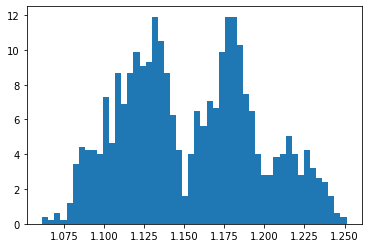

In [33]:
plt.hist(y, density = True, bins=50)
#plt.plot(np.arange(1.05,1.25,0.001), [abs(31*np.sin(20*x)*np.cos(20*x)**2) for x in np.arange(1,1.2,0.001)])

<AxesSubplot:xlabel='Open', ylabel='Density'>

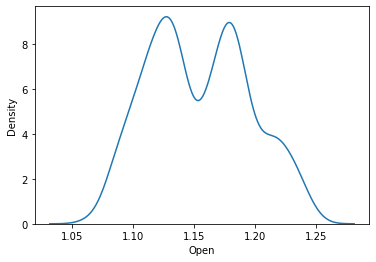

In [18]:
sns.kdeplot(y)

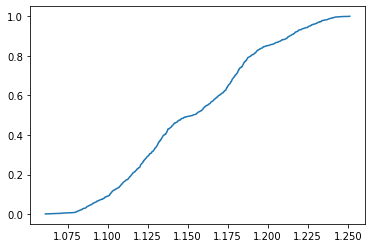

In [19]:
y_x,y_y = ecdf(y)
plt.plot(y_x,y_y)
#plt.plot(y_x,[-(31*np.cos(20*x)**3-31)/60 for x in y_x])

{'whiskers': [<matplotlib.lines.Line2D at 0x25273666160>,
 'caps': [<matplotlib.lines.Line2D at 0x25273666880>,
 'boxes': [<matplotlib.lines.Line2D at 0x25273657d60>],
 'medians': [<matplotlib.lines.Line2D at 0x25273666fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25273671370>],
 'means': []}

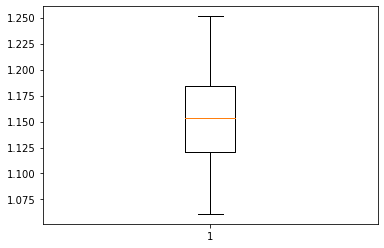

In [20]:
plt.boxplot(y)

### Średnie

In [21]:
def average(x):
    average = []
        #aritmetic
    asum = 0
    for row in x:
        asum += row
    aritmetic = asum/len(x)
    average.append(aritmetic)
    #geometric
    l = []
    for row in x:
        l.append(row)
    average.append(geometric_mean(l))
    #harmonic
    l = []
    for row in x:
        l.append(row)
    average.append(harmonic_mean(l))
    print('Średnia arytmetyczna: %f'%average[0])
    print('Średnia geometryczna: %f'%average[1])
    print('Średnia harmoniczna: %f'%average[2])
    print('---------------------')

In [22]:
average(x)

Średnia arytmetyczna: 3.801347
Średnia geometryczna: 3.796549
Średnia harmoniczna: 3.791760
---------------------


In [23]:
average(y)

Średnia arytmetyczna: 1.154113
Średnia geometryczna: 1.153368
Średnia harmoniczna: 1.152626
---------------------


In [24]:
def trimwins2():
    trimm = []
    rows = []
    wins = []
    with open("PLN.csv",'r') as file:
        cs = csv.reader(file)
        headers = next(cs)[1:]
        for row in cs:
            rows.append(row)
        for i in [1,3,4]:
            l = []
            for row in rows:
                l.append(float(row[i]))
            l.sort()
            g = []
            for k in np.arange(1,10,1):
                le = len(l)
                z = le-k
                a = k+1
                l = l[a:z]
                j = 1/(le-2*k)*sum(l)
                g.append(j)
            trimm.append(g)
        for i in [1,3,4]:
            l = []
            for row in rows:
                l.append(float(row[i]))
            l.sort()
            g = []
            for k in np.arange(1,10,1):
                le = len(l)
                a = k+1
                b = k+2
                c = le-k-1
                f = sum(l[b:c])
                j = 1/le*(a*l[k+1]+f+a*l[le-k])
                g.append(j)
            wins.append(g)
    return [trimm,wins]

In [25]:
def trimwins3():
    trimm = []
    rows = []
    wins = []
    with open("EURO.csv",'r') as file:
        cs = csv.reader(file)
        headers = next(cs)[1:]
        for row in cs:
            rows.append(row)
        for i in [1,3,4]:
            l = []
            for row in rows:
                l.append(float(row[i]))
            l.sort()
            g = []
            for k in np.arange(1,10,1):
                le = len(l)
                z = le-k
                a = k+1
                l = l[a:z]
                j = 1/(le-2*k)*sum(l)
                g.append(j)
            trimm.append(g)
        for i in [1,3,4]:
            l = []
            for row in rows:
                l.append(float(row[i]))
            l.sort()
            g = []
            for k in np.arange(1,10,1):
                le = len(l)
                a = k+1
                b = k+2
                c = le-k-1
                f = sum(l[b:c])
                j = 1/le*(a*l[k+1]+f+a*l[le-k])
                g.append(j)
            wins.append(g)
    return [trimm,wins]

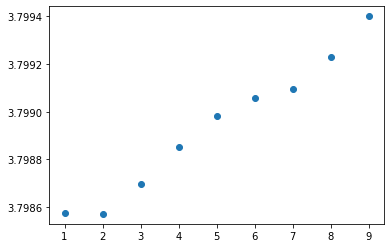

In [26]:
u = np.arange(1,10,1)
fun = trimwins2()
plt.scatter(u,fun[0][0]) #X ucinana

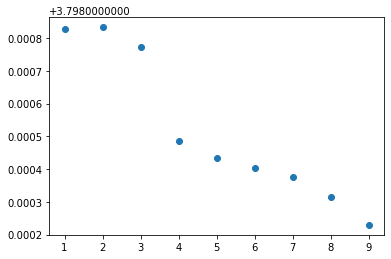

In [27]:
plt.scatter(u,fun[1][0]) #X winsor

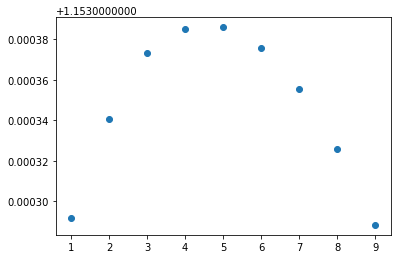

In [28]:
fun2 = trimwins3()
plt.scatter(u,fun2[0][0]) #Y ucinana

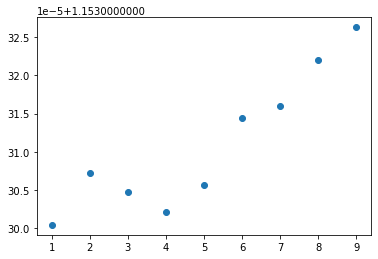

In [29]:
plt.scatter(u,fun2[1][0]) #Y winsor